# 1. Getting Started

Get started with image processing in PhenoTypic.

---

Getting started with image processing is straightforward. There's three classes of operations in `phenotypic`: `ImageOperation`, `MeasureFeature`, and `ImagePipeline`.

- `ImageOperation`(s): processes that operate on the data of an image in preparation for feature extraction with `MeasureFeature`.
- `MeasureFeature`(s) extract measurements from the objects within the image based on the pixel values.
- `ImagePipeline`(s) are a collection of operations and measurements compiled into a single class for convenience.

To get started with `phenotypic`, it's fastest to start by using one of the pipelines in `phenotypic.prefab`. Below we use `phenotypic.prefab.HeavyWatershedPipeline`, which was used for images of *Kluveromyces Marxianus* taken using an Epson V850 Pro Scanner.


In [1]:
import phenotypic as pht

filepaths = [x for x in
             pht.data.yield_sample_dataset(mode='filepath')]
print(filepaths[-2])  # lets show the filepath we'll be using

../../../../../src/phenotypic/data/PhenoTypicSampleSubset/6_1S_7.jpg


In [2]:
# We're gonna import the last image in the dataset, lets make an image with a grid in 96 array format
# Accepted filepaths are jpegs, tiffs, pngs, and RAW format files
# These images are jpegs so we set a bit depth of 8.
image = pht.GridImage.imread(filepaths[-2], nrows=8, ncols=12, bit_depth=8)
image.show()

## Processing your first image

---
Here we're gonna import the last image in the dataset, since its from the last timepoint and should have reasonable growth. Accepted file formats are jpegs, tiffs, pngs, and RAW files.

**Important things to note:**
 - `bit_depth` will have an important role in memory usage and accuracy. For jpegs, this will always be 8. For other image formats, consult your camera documentation for information. You may also find this information in your image metadata, depending on the format. PhenoTypic supports bit depths of 8 and 16. If not provided, PhenoTypic will try to guess this information from the imported image data.

In [3]:
from phenotypic.prefab import HeavyGitterPipeline

pipe = HeavyGitterPipeline()
measurements = pipe.apply_and_measure(image, inplace=True)
measurements.head()

,Metadata_FileSuffix,Metadata_BitDepth,Metadata_ImageType,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,.jpg,8,GridImage,6_1S_7,1,139.576551,686.713517,110,657,172,...,0.309804,0.435294,0.448946,0.462745,0.478431,0.498039,0.043166,0.096185,5.538571,5.791290
1,.jpg,8,GridImage,6_1S_7,2,148.151559,362.125000,113,331,184,...,0.313725,0.454902,0.477968,0.498039,0.517647,0.545098,0.052580,0.110040,6.499312,6.811936
2,.jpg,8,GridImage,6_1S_7,3,147.168975,535.913820,115,505,180,...,0.317647,0.443137,0.479812,0.505882,0.521569,0.552941,0.058114,0.121155,7.063123,7.547446
3,.jpg,8,GridImage,6_1S_7,4,150.986417,1011.233214,116,977,187,...,0.313725,0.462745,0.481581,0.501961,0.517647,0.537255,0.051533,0.107035,5.642369,5.792222
4,.jpg,8,GridImage,6_1S_7,5,145.111368,1969.141950,120,1947,171,...,0.321569,0.419608,0.439005,0.447059,0.466667,0.517647,0.041147,0.093781,8.118938,8.275674


Let's now visualize what objects were detected in the image.

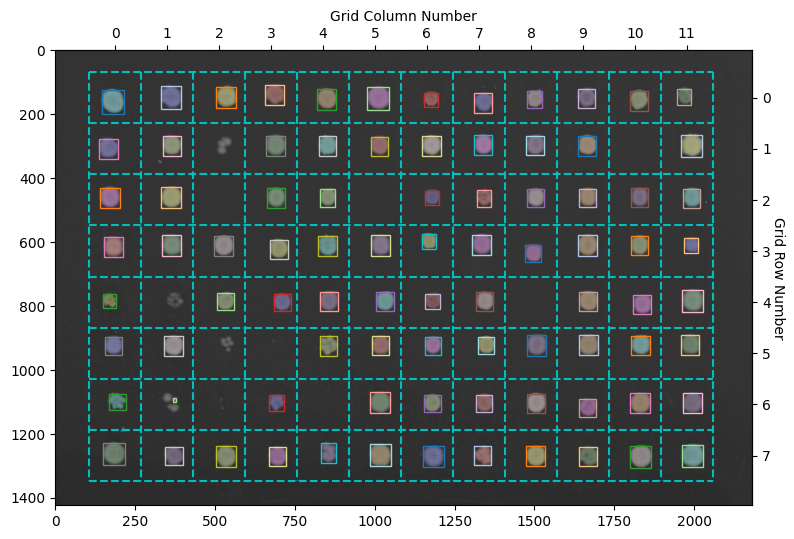

In [4]:
fig, ax = image.show_overlay()  # Returns a matplotlib.pyplot Figure & Axes

Here the objects with a colored overlay over them represent the different objects detected in your image. The boxes show the objects belonging to a specific grid section. The `HeavyWatershedPipeline` takes steps to ensure only one object in each section remains for downstream analysis. In reality, more objects were probably detected, but the refinement steps removed them according tos trict filters